# Making Hybrid Image

### Load `numpy` and `matplotlib`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read Monroe image (crop from a public domain phtot) into a numpy array.


In [2]:
m_crop = plt.imread("img/m_crop.png")
print("shape of the png image:", m_crop.shape)
m_crop = m_crop[:, :, 0]
print("shape of the grayscale image:", m_crop.shape)
m_crop

('shape of the png image:', (1160, 1144, 4))
('shape of the grayscale image:', (1160, 1144))


array([[ 0.14509805,  0.09803922,  0.09803922, ...,  0.11372549,
         0.11372549,  0.13725491],
       [ 0.14509805,  0.09803922,  0.09803922, ...,  0.10980392,
         0.11372549,  0.14117648],
       [ 0.14509805,  0.09803922,  0.09803922, ...,  0.10980392,
         0.11372549,  0.14117648],
       ..., 
       [ 0.48235294,  0.45490196,  0.45882353, ...,  0.56862748,
         0.56470591,  0.57647061],
       [ 0.48235294,  0.45490196,  0.45882353, ...,  0.56862748,
         0.56470591,  0.57647061],
       [ 0.48627451,  0.45882353,  0.4627451 , ...,  0.56862748,
         0.56470591,  0.57647061]], dtype=float32)

### Show the image

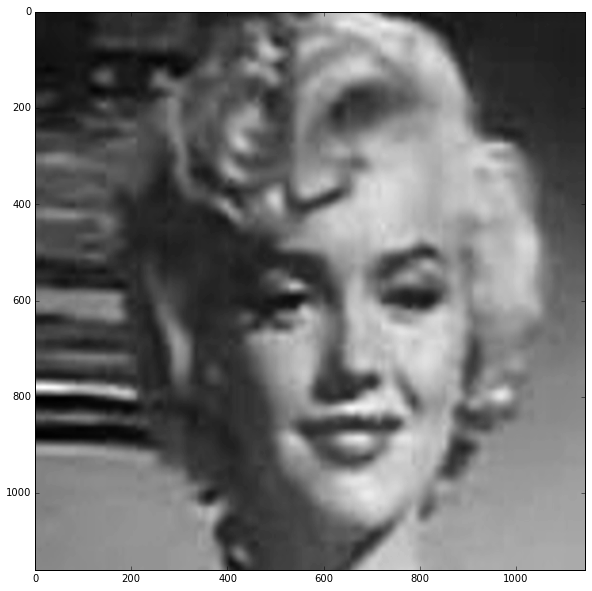

In [3]:
def show(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap="gray")
show(m_crop)

### Load and show Einstein image (crop from a public domain photo)

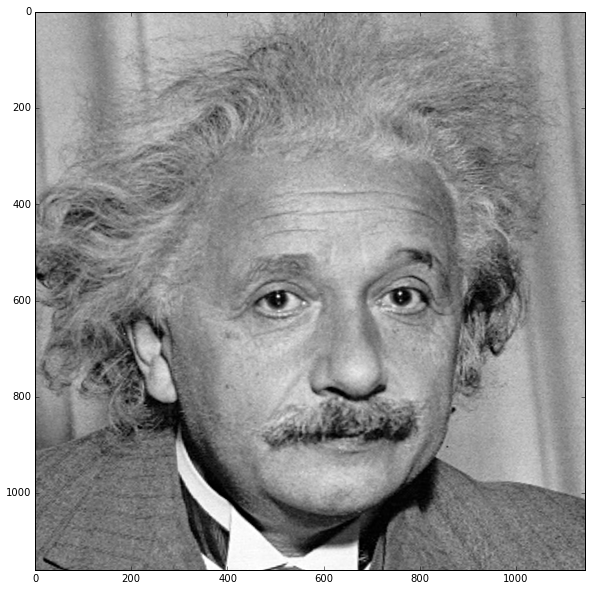

In [4]:
e_crop = plt.imread("img/e_crop.png")[:, :, 0]
show(e_crop)

## 2D Gaussian filter

The 2D Gaussian kernel is defined as
$$g(x,y) = \frac{1}{2\pi \sigma^2} \cdot e^{-\frac{x^2 + y^2}{2 \sigma^2}}.$$
and a Gaussian filter (or Gaussian blur) is just a convolution $*$ with a Gaussian kernel.

We can use the convolution theorem 
$$f*g= \mathcal{F}^{-1}\big\{\mathcal{F}\{f\}\cdot\mathcal{F}\{g\}\big\} $$
and FFT to implement the gaussian filter

In [5]:
# In case you don't have scipy installed
# you can use our home made gaussian_filter
# see also https://gist.github.com/thearn/5424195 http://subsurfwiki.org/wiki/Gaussian_filter
from numpy.fft import fft2, ifft2
from numpy import exp, pi

def my_gaussian_filter(img, sigma):
    "build the 'rolled' gaussion kernel, so that [0,0] is really (0,0)"
    # technical part, mostly setting up the range of spatial domain
    cx, cy = img.shape[0]//2, img.shape[1]//2        # center positions
    x1 = np.roll(np.arange(-cx, cx), cx)             # rolled x cordinate
    y1 = np.roll(np.arange(-cy, cy), cy)             # rolled y cordinate
    x, y = np.meshgrid(y1, x1)                       # rolled grid
    # Math part
    g = exp(-(x**2+y**2)/2/sigma**2)/(2*pi*sigma**2) # and finally, the gaussian filter
    return np.real(ifft2(fft2(img)*fft2(g)))         # convolution

gaussian_filter = my_gaussian_filter

# if you have scipy installed, you can use it.
#from scipy.ndimage.filters import gaussian_filter

### Remark

```python
>>> x = np.arange(10)
>>> x
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> np.roll(x, 2)
array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])
```

### Low frequency part of Monroe image

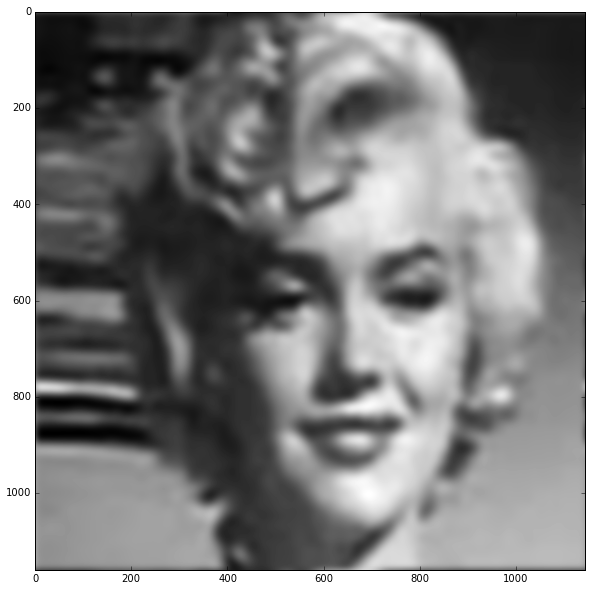

In [6]:
m_blur = gaussian_filter(m_crop, 7)
show(m_blur)

### Low frequency part of Einstein image

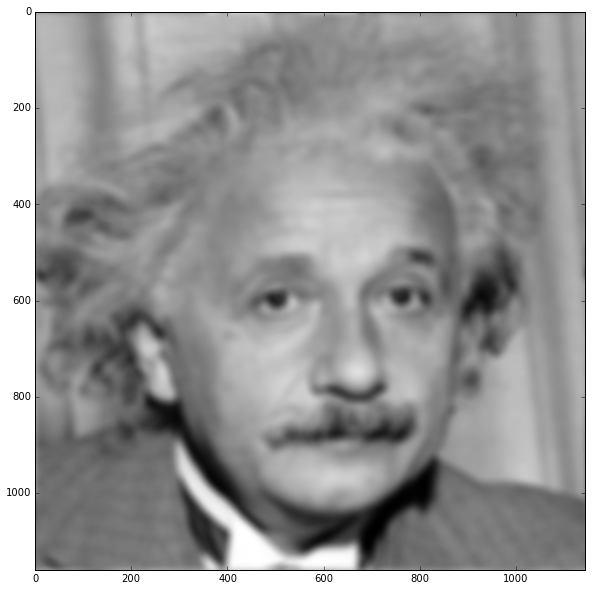

In [7]:
e_blur = gaussian_filter(e_crop, 7)
show(e_blur)

### High freqency part is just all - low frequency part.

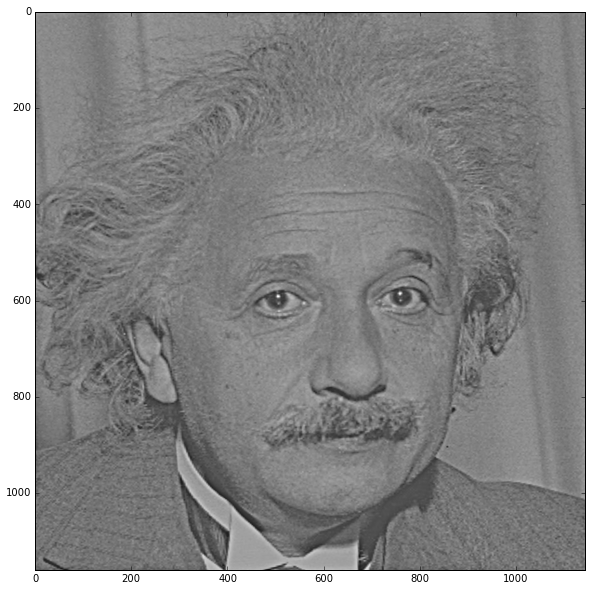

In [8]:
e_highpass = e_crop - e_blur
show(e_highpass)

### Combine highpass Einstein with lowpass Monroe. Here is our hybrid image.

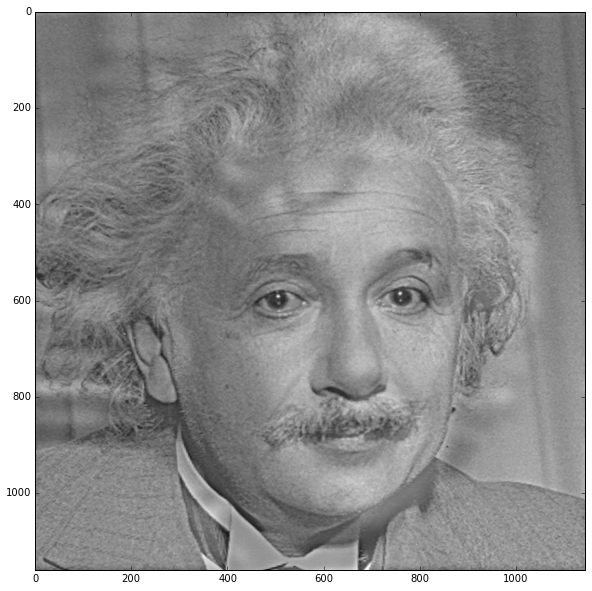

In [9]:
show( e_highpass*0.5 + m_blur*0.5) 

## Optional
### Use interactive widgets to play with parameters

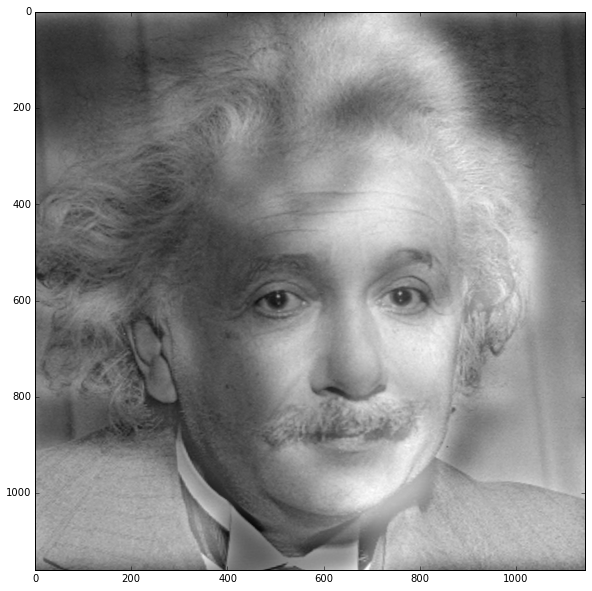

In [10]:
from ipywidgets import interact
import ipywidgets as widgets
@interact(sigma=widgets.FloatSlider(min=1, max=30, step=1, value=5),
         lowpass_weight=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.05))
def hybrid(sigma=5, lowpass_weight=0.5):
    m_blur = gaussian_filter(m_crop, sigma)
    e_blur = gaussian_filter(e_crop, sigma)
    e_highpass = e_crop - e_blur
    show(m_blur*lowpass_weight + e_highpass*(1-lowpass_weight))                  